#  IPL Team Winner Prediction                        

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India.The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues.In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube.



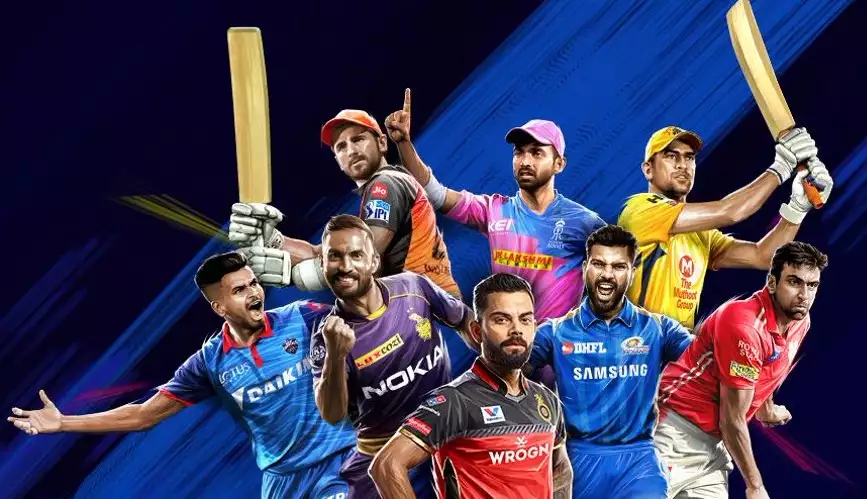

### Objective:

In this Machine Learning Project , Main objective is to predict the winner of the upcoming IPL season.I have collected the dataset from Kaggle (https://www.kaggle.com/saurav9786/indian-premier-league-match-analysis/kernels) and I will be using Machine Learning to make predictions.

### Contents :

    PART1 : Understanding the Dataset
    PART2 : Exploratory Data Analysis
    PART3 : Data Cleaning
    PART4 : Data Modelling and Model Validation
    PART5 : Conclusion

### PART1 - Understanding the Data

The Data contains following the columns :-

    id :- Each row has a unique id
    season :- The year in which the game is played
    city:- City in which the game was played
    date:- Data on which the game was played
    team1:- Name of the team
    team2:- Name of the other team
    toss_winner:- team which won the toss
    toss_decision :- decision after winning the toss whether to bat ot bowl
    result:- whether the match has outcome , tie or others
    dl_applied:- Whether the duckworth lewis is applied or not
    winner :- team winning the game
    win_by_runs:- the no of runs by which the team won
    win_by_wickets:-the no of wickets by which the team win
    player_of_match:- the player with the most outstanding performance
    venue:- The stadium where the match was played
    umpire 1:- Name of the first Umpire
    umpire 2:- Name of the second Umpire
    umpire 3:- Name of the third empire

#### Import the Required Libraries

Let's first import all the necessary libraries. I'll use numpy and pandas to start with. For visualization, I will use pyplot subpackage of matplotlib. For implementing Machine Learning models and processing of data, I will use the sklearn library.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

### Part 2 : Exploratory Data Analysis (EDA)

Tasks:
    
    A) Transform or Clean the data and Treat the Missing Data 
    B) Grab the insights of the data  

In [2]:
df = pd.read_excel('IPL.xlsx')
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05 00:00:00,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06 00:00:00,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07 00:00:00,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08 00:00:00,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08 00:00:00,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09 00:00:00,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09 00:00:00,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10 00:00:00,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11 00:00:00,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12 00:00:00,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [3]:
## YOUR CODE HERE - USE AS MANY CELLS AS YOU LIKE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


### A) Transform or Cleaning the data 

#### 1) Finding out the number of missing data existing in the each column of the data

In [4]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

From the above information , we can see that UMPIRE3 column doesn't have most of the data.So, we can remove that column.

In [5]:
df.drop(['umpire3'],axis=1,inplace=True)
df.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05 00:00:00,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06 00:00:00,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


#### 2)Treating the missing values of city , winner ,player of match ,umpire1, umpire2 by removing the records as there is very less missing data

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

#### B) Now, we are going to grab the insights of each feature

#### 1) Season - In which season more IPLs got conducted

In [7]:
df['season'].value_counts()

2013    76
2012    74
2011    72
2018    60
2016    60
2010    60
2019    58
2017    58
2008    58
2015    57
2009    57
2014    53
Name: season, dtype: int64

Text(0.5, 1.0, 'Total Number of Matches between 2008 - 2019')

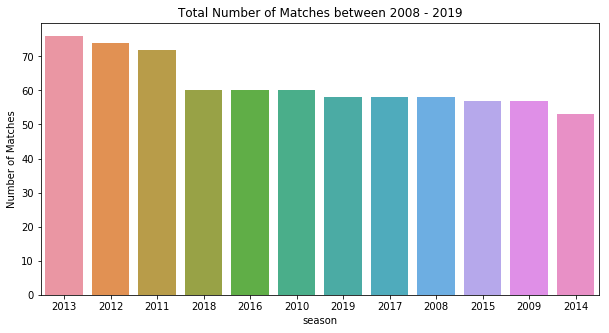

In [8]:
plt.figure(figsize=(10,5))
ax=sns.countplot('season',data=df,order=df['season'].value_counts().index)
plt.ylabel('Number of Matches')
plt.title('Total Number of Matches between 2008 - 2019')

From the above information , we can see that more matches got occured in 2013

#### 2) Teams that present in IPL seasons

In [9]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

There are total 14 teams in IPL Matches , here Rising Pune Supergiant and Rising Pune Supergiants are same

#### 3) Toss Winners Visualization - Which team won more in Tosses from 2008 to 2019

In [10]:
df['toss_winner'].value_counts()

Mumbai Indians                 96
Kolkata Knight Riders          91
Chennai Super Kings            89
Kings XI Punjab                80
Delhi Daredevils               79
Royal Challengers Bangalore    78
Rajasthan Royals               77
Sunrisers Hyderabad            45
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                  9
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

Text(0.5, 1.0, 'Total Number of Matches between 2008 - 2019')

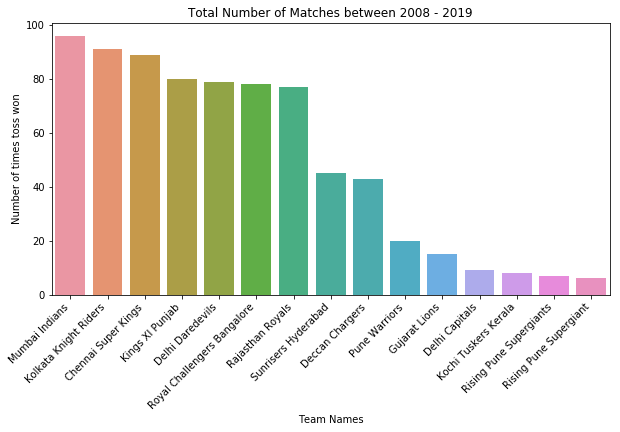

In [11]:
plt.figure(figsize=(10,5))
ax=sns.countplot('toss_winner',data=df,order=df['toss_winner'].value_counts().index)
plt.ylabel('Number of times toss won')
plt.xlabel('Team Names')
plt.xticks(rotation =45,ha='right')
plt.title('Total Number of Matches between 2008 - 2019')

From the above graph , we can see that Mumbai Indians won tosses most of the times in IPL seasons

#### 4) Number of IPL matches won by each team based on each year from 2008 to 2019

In [12]:
winner_counts = df.groupby('season')['winner'].value_counts()
winner_counts

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
        Delhi Daredevils                7
        Kolkata Knight Riders           7
        Rajasthan Royals                

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

<Figure size 1440x4320 with 0 Axes>

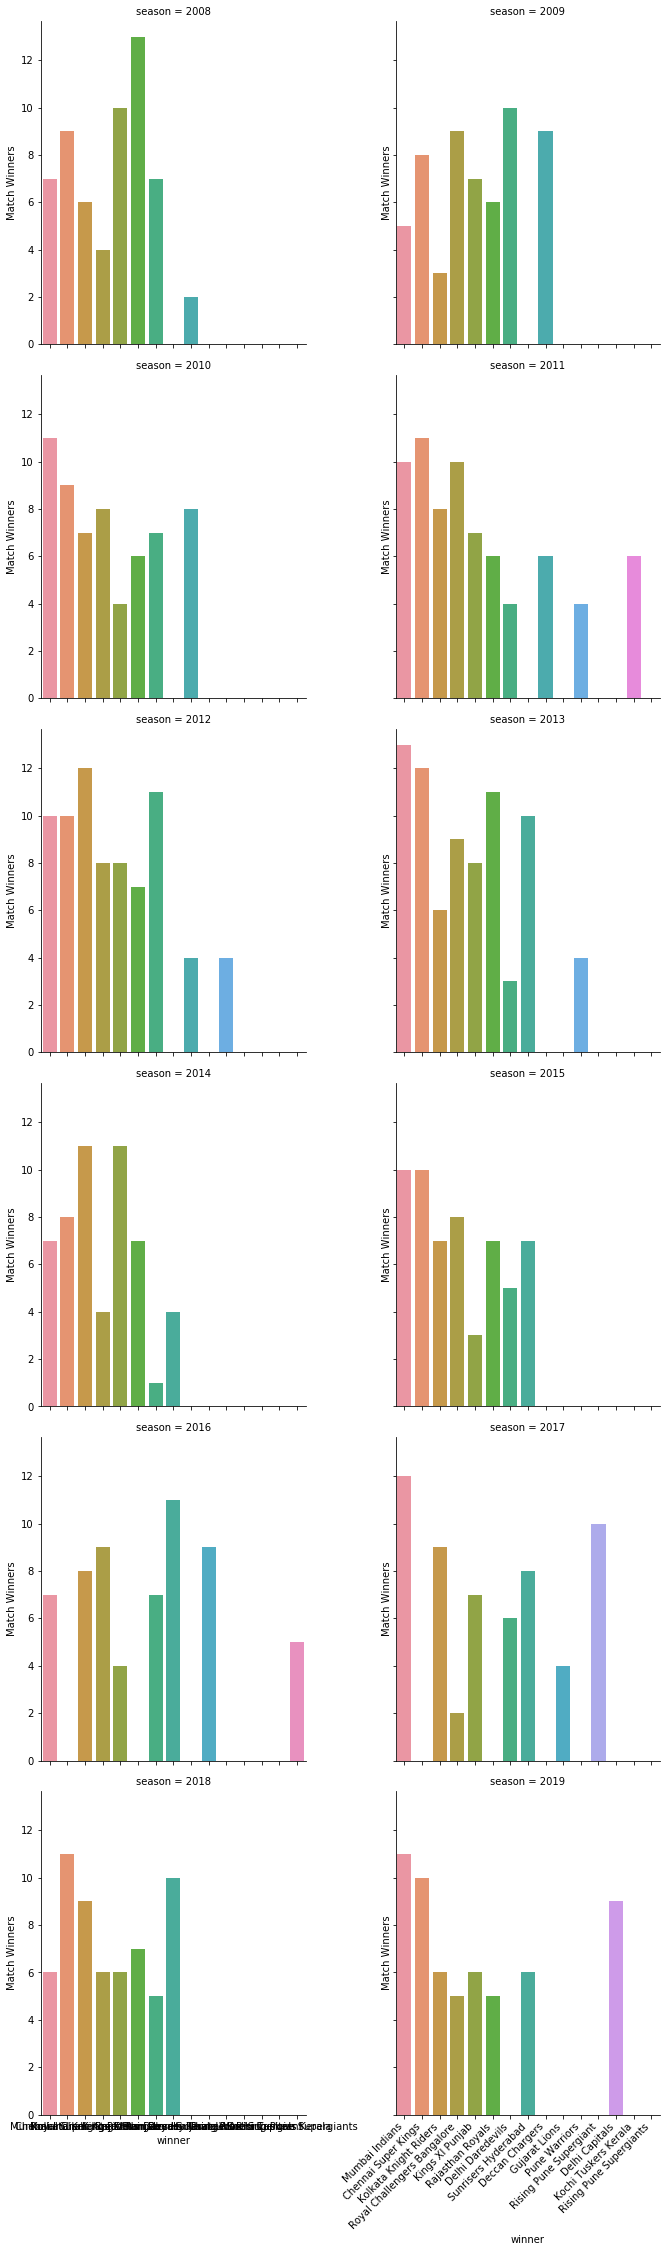

In [13]:
plt.figure(figsize=(20,60))
ax=sns.catplot('winner',col='season',data=df,kind='count',legend=True,col_wrap=2,order=df['winner'].value_counts().index)
ax.set(ylabel = 'Match Winners')
plt.xticks(rotation=45,ha='right')

#### 5) Checking whether Toss Winning affects the Match Winner

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

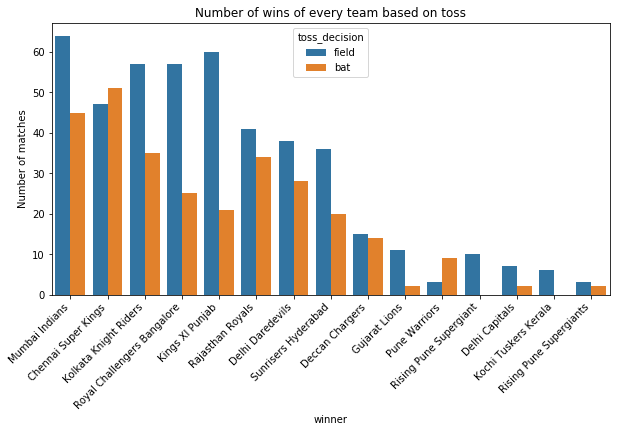

In [14]:
plt.figure(figsize=(10,5))
ax = sns.countplot('winner',data=df,hue='toss_decision',order=df['winner'].value_counts().index)
plt.ylabel('Number of matches')
plt.title('Number of wins of every team based on toss')
plt.xticks(rotation=45,ha='right')

#### 6) Won most player of the matches 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

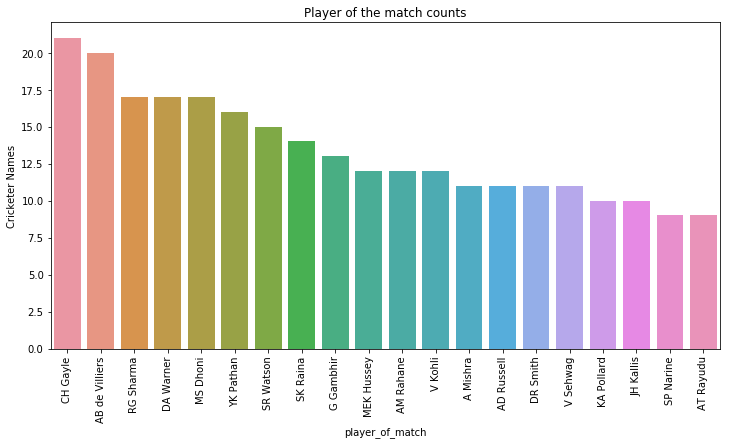

In [15]:
plt.figure(figsize=(12,6))
ax=sns.countplot('player_of_match',data=df,order=df['player_of_match'].value_counts()[:20].index)
plt.ylabel('Cricketer Names')
plt.title('Player of the match counts')
plt.xticks(rotation = 90)

From the above , we can conclude that CH Gayle won most times the player of the match in the IPL season from 2008-2019

#### 7) Each Season Final Team winner  

In [16]:
season_winner = df.groupby('season')['season','winner'].tail(1)
season_winner_sort = season_winner.sort_values(by=['season'])
season_winner_sort

,season,winner
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad
58,2017,Mumbai Indians


### Part 3  : Data PreProcessing 

Task - Use Columns "team1", "team2", "toss_winner","toss_decision" as your data features to predict for "winner"

1. Converting the categorical data to Numerical data 
2. Splitting the Processed datasets to required datasets
3. Splitting the datasets to Training and Testing Datasets

In [17]:
pre_data = df[['team1','team2','toss_winner','toss_decision','winner']]
pre_data.head(10)

,team1,team2,toss_winner,toss_decision,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad
6,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians
7,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,Kings XI Punjab
8,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,Delhi Daredevils
9,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,Mumbai Indians
10,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders


#### 1) Labelling the data of team names for ease in modelling

In [18]:
for i in pre_data.columns:
    pre_data[i].replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants','Delhi Capitals'],
        [1,2,3,4,5,6,7,8,9,10,11,12,13,4,14],inplace = True)
pre_data['toss_decision'] = pd.get_dummies(pre_data['toss_decision'])

#### 2) Splitting the pre_data to x and y datasets 

In [19]:
x = pre_data.drop(columns=['winner'],axis=1)
y = pre_data['winner']

In [20]:
x.head(2)

,team1,team2,toss_winner,toss_decision
0,1,5,5,0
1,2,4,4,0


In [21]:
y.head(2)

0    1
1    4
Name: winner, dtype: int64

#### 3) Splitting the datasets to Training Dataset and Testing Dataset

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=0)
x_train.head(2)

,team1,team2,toss_winner,toss_decision
78,9,7,9,1
353,10,8,10,1


In [24]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 78 to 695
Data columns (total 4 columns):
team1            557 non-null int64
team2            557 non-null int64
toss_winner      557 non-null int64
toss_decision    557 non-null uint8
dtypes: int64(3), uint8(1)
memory usage: 18.0 KB


In [25]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 197 to 294
Data columns (total 4 columns):
team1            186 non-null int64
team2            186 non-null int64
toss_winner      186 non-null int64
toss_decision    186 non-null uint8
dtypes: int64(3), uint8(1)
memory usage: 6.0 KB


### Part  4 : Model Selection

    Building the Model with Scikit-Learn
    a) Generation of Classification Report
    b) Measuring the Accuracy of the Model

Tasks : 
1) Build a Predictive Model with Scikit-learn using any ML Technique.
a) Generate a Classification Report, Accuracy Metric, F1 Score and any other evaluative metrics deemed necessary by you.
b) Explain your model and your evaluation metrics

In [26]:
#Import the necessary Machine Learning Technique Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [27]:
#Import the libraries for generating the Metrics of the Model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

### 1) Building KNN Classifier Model

In [28]:
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
#Predicting the test result
y_pred_KNN = classifier.predict(x_test)
y_pred_KNN

array([ 9,  7,  2,  5,  2,  6,  9,  9,  9,  6,  5,  9,  6,  9, 10,  6,  6,
        8,  6,  6, 13,  2,  2, 11,  2, 11,  6,  5,  1, 10,  2,  1, 10,  7,
        8,  9,  2,  2,  8,  8,  9,  4,  6,  1,  1,  9,  2,  2,  5,  9,  1,
        2,  6,  6,  2,  6,  1,  6,  5,  6,  5,  2,  8,  6, 10,  9,  2,  7,
        2,  8,  6,  6,  1,  6, 10,  1,  6,  9,  6,  6,  6,  2,  2,  1,  8,
       10,  1,  6,  2,  9,  2, 10,  2,  9,  6, 13,  2,  2,  6,  5,  5,  2,
        2,  2,  7,  6,  5, 10, 10, 10, 10, 13, 11,  6,  4,  6,  9,  5, 11,
        6,  2,  5,  2,  8,  5,  6,  3,  6,  8,  6,  7,  1,  3,  7,  8,  2,
        8,  1,  2,  8,  8,  7,  9, 10,  1,  9,  2,  2, 10,  6,  8,  8,  1,
        7,  1,  1,  8,  2,  6,  5, 10,  9,  5,  1,  1,  5,  7, 13,  6,  5,
        6,  2, 10,  8,  9, 11,  7,  6,  6,  2,  6,  2,  2,  2,  6, 10],
      dtype=int64)

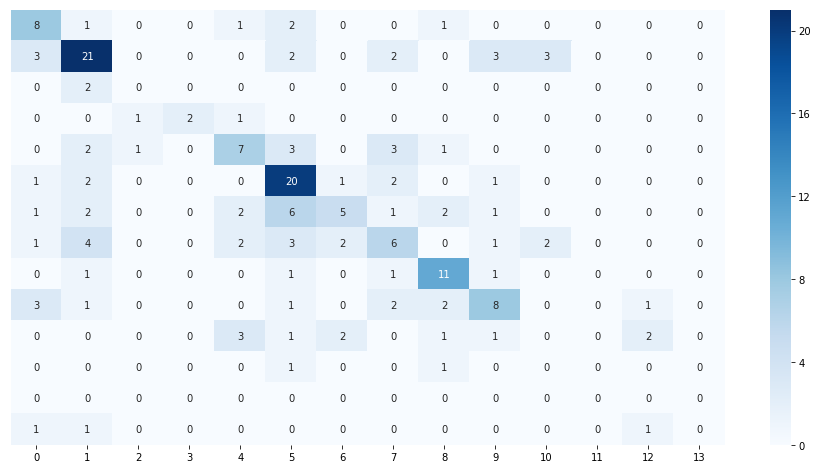

In [30]:
plt.figure(figsize=(16,8))
sns.heatmap(confusion_matrix(y_test,y_pred_KNN),yticklabels=False,cmap='Blues',annot=True)

#### a) Generating Classification Report

In [31]:
print(classification_report(y_test,y_pred_KNN)) 

              precision    recall  f1-score   support

           1       0.44      0.62      0.52        13
           2       0.57      0.62      0.59        34
           3       0.00      0.00      0.00         2
           4       1.00      0.50      0.67         4
           5       0.44      0.41      0.42        17
           6       0.50      0.74      0.60        27
           7       0.50      0.25      0.33        20
           8       0.35      0.29      0.32        21
           9       0.58      0.73      0.65        15
          10       0.50      0.44      0.47        18
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         3

   micro avg       0.47      0.47      0.47       186
   macro avg       0.35      0.33      0.33       186
weighted avg       0.46      0.47      0.45       186



C:\Users\Laxmi Mounica\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Laxmi Mounica\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Laxmi Mounica\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Laxmi Mounica\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### b) Evaluation Matrix

In [32]:
accuracy_score(y_test,y_pred_KNN)

0.4731182795698925

### 2) Building Descision Tree Classifier Model

In [33]:
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_dt.fit(x_train,y_train)
y_pred_dt = classifier_dt.predict(x_test)
y_pred_dt

array([ 9,  7,  4,  4,  2,  1,  9,  9,  8,  6,  5,  9,  1,  9, 10,  7,  6,
        8,  6,  6, 12,  2,  2, 11,  2, 11,  6, 11,  1, 10,  1,  1, 10,  7,
        6,  9,  2,  2,  8,  6,  9,  4,  7,  1,  1,  9,  7,  2,  5,  9,  1,
        2,  6,  6,  2,  6,  2,  2,  5,  6,  5,  2,  8,  6, 10,  9, 10,  7,
        2,  2,  6,  6,  1,  6, 10,  1,  1,  8,  7,  7,  6,  2,  2,  1,  6,
       10,  1,  5,  2,  9,  2, 10,  2,  9,  6, 13,  2,  2,  5,  5,  5, 10,
       13,  2,  6,  2,  5, 10, 10,  9, 10, 11,  5,  5,  4,  7,  9,  5,  5,
        5,  7, 11,  2,  8,  5,  5,  3,  1,  8,  6,  7,  1,  4,  6,  8,  1,
        8,  1,  3,  8,  8,  7,  9, 10,  2, 10,  2,  2, 10,  6,  2,  8,  1,
        7,  1,  1,  8,  2,  6,  5, 10,  9,  5,  1,  1,  6,  5, 13,  6,  5,
        6,  2, 10,  5, 10, 11,  7,  6,  6,  3,  6,  2,  5,  2,  6, 11],
      dtype=int64)

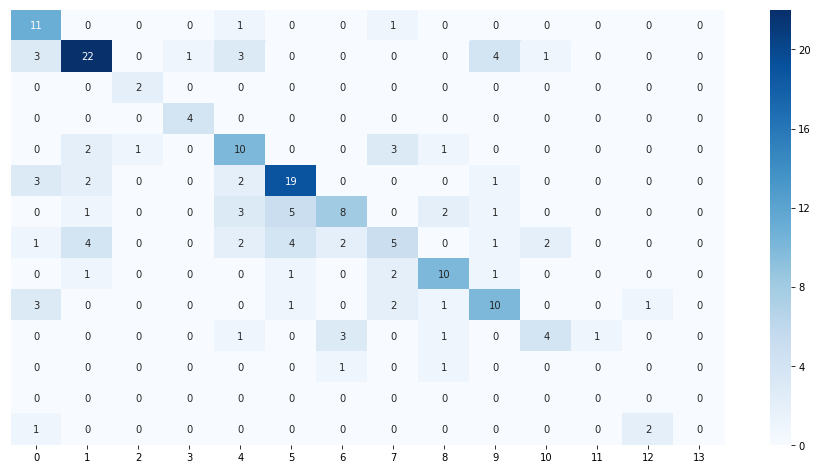

In [34]:
plt.figure(figsize=(16,8))
sns.heatmap(confusion_matrix(y_test,y_pred_dt),yticklabels=False,cmap='Blues',annot=True)

#### a) Generating Classification report

In [35]:
print(classification_report(y_test,y_pred_dt)) 

              precision    recall  f1-score   support

           1       0.50      0.85      0.63        13
           2       0.69      0.65      0.67        34
           3       0.67      1.00      0.80         2
           4       0.80      1.00      0.89         4
           5       0.45      0.59      0.51        17
           6       0.63      0.70      0.67        27
           7       0.57      0.40      0.47        20
           8       0.38      0.24      0.29        21
           9       0.62      0.67      0.65        15
          10       0.56      0.56      0.56        18
          11       0.57      0.40      0.47        10
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         3

   micro avg       0.56      0.56      0.56       186
   macro avg       0.46      0.50      0.47       186
weighted avg       0.56      0.56      0.55       186



C:\Users\Laxmi Mounica\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Laxmi Mounica\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Laxmi Mounica\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Laxmi Mounica\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### b) Evaluation Matrix

In [36]:
accuracy_score(y_test,y_pred_dt)

0.5645161290322581

### 3) Building Random Forest classifier Model

In [37]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
#Predicting the test set result  
y_pred_rf= classifier.predict(x_test)  
y_pred_rf

array([ 9,  7,  4,  4,  2,  1,  9,  9,  8,  6,  5,  9,  1,  9, 10,  7,  6,
        8,  6,  6, 12,  2,  2, 11,  2, 11,  6, 11,  1, 10,  4,  1, 10,  8,
        6,  9,  2,  2, 11,  6,  9,  4,  7,  1,  1,  9,  7,  2,  2,  9,  1,
        2,  6,  6,  2, 12,  2,  6,  5,  6,  5,  2,  8,  6, 10, 12, 10,  8,
        2,  2,  6,  6,  1,  6, 10,  1,  1, 14,  7,  7,  6,  2,  2,  1,  6,
       10,  6,  5,  2,  9,  2, 10,  2,  9,  6, 13,  2,  2,  5,  5,  5, 10,
        2,  2,  6,  6,  5, 10, 10,  9, 10, 11,  5,  2,  4,  7,  9,  5,  5,
        5,  7, 11,  2,  8,  5,  5,  3,  1,  8, 10,  7,  5,  4,  6,  8,  4,
        8,  1,  3,  8,  8,  8,  9, 10,  2, 10,  2,  2, 10,  6,  2, 11,  1,
        7,  1,  6,  8,  2,  6,  5, 10,  9,  5,  1,  1,  6,  5, 13,  6,  5,
        8,  2, 10,  5, 10, 11, 11,  6,  6,  3,  6,  2,  5,  2,  6, 10],
      dtype=int64)

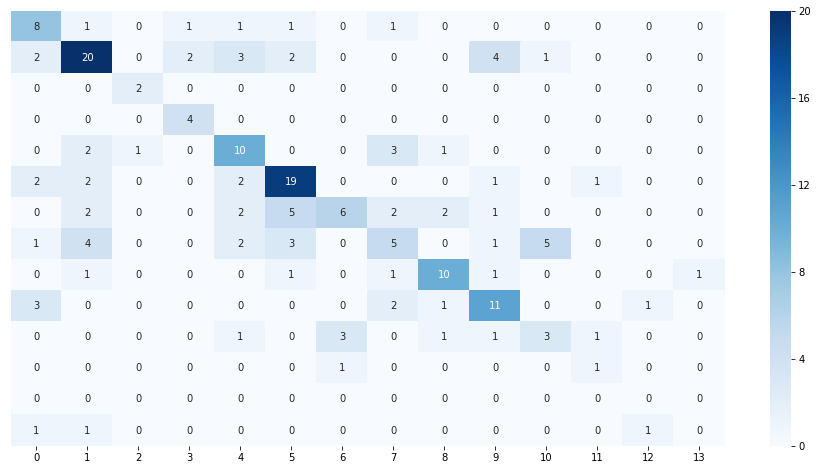

In [39]:
plt.figure(figsize=(16,8))
sns.heatmap(confusion_matrix(y_test,y_pred_rf),yticklabels=False,cmap='Blues',annot=True)

#### a) Generating Classification Report

In [40]:
print(classification_report(y_test,y_pred_rf)) 

              precision    recall  f1-score   support

           1       0.47      0.62      0.53        13
           2       0.61      0.59      0.60        34
           3       0.67      1.00      0.80         2
           4       0.57      1.00      0.73         4
           5       0.48      0.59      0.53        17
           6       0.61      0.70      0.66        27
           7       0.60      0.30      0.40        20
           8       0.36      0.24      0.29        21
           9       0.67      0.67      0.67        15
          10       0.55      0.61      0.58        18
          11       0.33      0.30      0.32        10
          12       0.33      0.50      0.40         2
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         3

   micro avg       0.53      0.53      0.53       186
   macro avg       0.45      0.51      0.46       186
weighted avg       0.53      0.53      0.52       186



C:\Users\Laxmi Mounica\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Laxmi Mounica\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Laxmi Mounica\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### b) Evaluating Matrix

In [41]:
accuracy_score(y_test,y_pred_rf)

0.532258064516129

In [42]:
print(f"KNN Model Accuracy : {round(accuracy_score(y_test,y_pred_KNN)*100)} %")
print(f"Decision Tree Model Accuracy : {round(accuracy_score(y_test,y_pred_dt)*100)} %")
print(f"Random Forest Model Accuracy : {round(accuracy_score(y_test,y_pred_rf)*100)} %")

KNN Model Accuracy : 47.0 %
Decision Tree Model Accuracy : 56.0 %
Random Forest Model Accuracy : 53.0 %


### PART 5 - CONCLUSION :

1) Decision Tree Classifier gives the best accurate model when compared with KNN & Random Forest Classifier

2) Data Cleaning played a major role in achieving better accuracy

3) Visualizing Data helped us alot to identify the patterns of data